# Assignment 07: Stats & Modelling

## Step 2: Using the same Shakespeare play from your Week 6 Assignment:

Tokenize the words, remove stopwords, stem or lemmatize the words, and calculate the word frequencies

In [30]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.probability import FreqDist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
response = requests.get('https://www.gutenberg.org/files/1524/1524-h/1524-h.htm')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")


In [3]:
document = document.text

In [4]:
for i in ['\n','[',']','’','”','“', '\r']:
    document = document.replace(i,' ')

In [9]:
sentences = sent_tokenize(document)
words = word_tokenize(document.lower())
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStopWords = [w for w in words if w not in myStopWords]
freq = FreqDist(wordsNoStopWords)

In [11]:
word = []
frequency = []

for i in sorted(freq, key=freq.get, reverse=True):
    word.append(i)
    frequency.append(freq[i])
    
wordfrequency = pd.DataFrame({'word': word,
                              'frequency': frequency},
                             columns = ['word', 'frequency'])

print('mean = ', wordfrequency['frequency'].mean())
print('median = ', wordfrequency['frequency'].median())
print('mode = ', wordfrequency['frequency'].mode())


mean =  3.780854906682721
median =  1.0
mode =  0    1
dtype: int64


To get the trimmed mean, looked at where the frequency started showing 5, as words occuring 1, 2, 3, or 4 times aren't the most frequent and aren't as interesting and relevant I thought.

In [14]:
print('trimmed mean =', wordfrequency[wordfrequency['frequency'] > 5].mean())


trimmed mean = frequency    20.737303
dtype: float64


/tmp/ipykernel_2531/685426329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('trimmed mean =', wordfrequency[wordfrequency['frequency'] > 5].mean())


<AxesSubplot:ylabel='Frequency'>

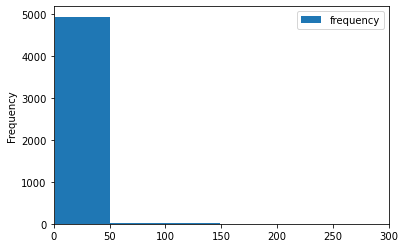

In [18]:
wordfrequency.plot(kind='hist', xlim=(0,300))


array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

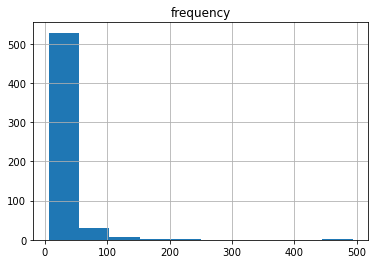

In [19]:
wordfrequency[wordfrequency['frequency'] > 5].hist()


In [20]:
print('interquartile range =', wordfrequency['frequency'].quantile(0.75) - wordfrequency['frequency'].quantile(0.25))
print('std =', wordfrequency['frequency'].std())

interquartile range = 2.0
std = 13.641645019403855


## Step 3: Foray into machine learning

Import scikit-learn's example diabetes dataset as a Panda's dataframe with the following code:

In [21]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

Use the following code to view a description of the dataset:

In [23]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Do some exploratory data analysis of the features, including getting summary statistical information

In [24]:
features_df.describe().round(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561


Find the column in features_df that has the highest correlation coefficient with the target values in target_df

In [28]:
columns = list(features_df.columns)
correlateco = []
for column in columns:
    corr = np.corrcoef(features_df[column],target_df)
    correlateco.append(corr[0,1])

print(correlateco)
print('max correlation coefficient =', columns[correlations.index(max(correlations))])

[0.18788875071891983, 0.0430619984516054, 0.5864501344746891, 0.4414838489308862, 0.2120224810145508, 0.17405358696874249, -0.39478925067091847, 0.4304528847447734, 0.5658834252428094, 0.3824834842485812]
max correlation coefficient = bmi


Make a scatter plot of the target values vs this feature column's values and comment on how the plotted points match up with the correlation coefficient

<AxesSubplot:xlabel='features', ylabel='target'>

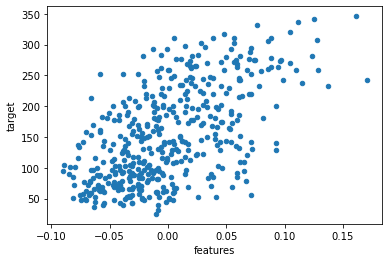

In [29]:
featurestarget = pd.DataFrame({'features': features_df['bmi'],
             'target': target_df},
             columns = ['features', 'target'])

featurestarget.plot(kind='scatter', x='features', y='target')

There is a moderate positive correlation.

Using this feature and target, perform linear regression with sklearn's LinearRegression

In [31]:
x=features_df[['bmi']]
y=target_df
linereg = LinearRegression().fit(x, target_df)

Print the coefficients of the model

In [33]:
linereg.coef_

array([949.43526038])

Plot the linear fit on top of the scatter plot

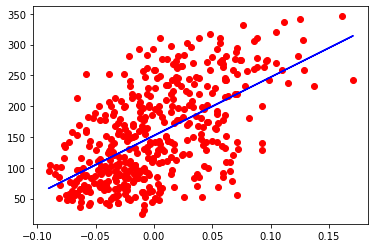

In [34]:
linereg.intercept_
ytrain = linereg.intercept_ + linereg.coef_ * x
plt.plot(x,y,'ro',x,ytrain,'b-');


Calculate (or output) the mean squared error and R-squared values for your fit

In [35]:
print('mean squared error =', mean_squared_error(y, ytrain))
print('r-squared value =', r2_score(y, ytrain))

mean squared error = 3890.4565854612724
r-squared value = 0.3439237602253803


Try doing linear regression with another variable and check how the new fit's mean squared error and R-squared values change.

min correlation coefficient = s3
mean squared error = 5005.661620710653
r-squared value = 0.1558585524453051


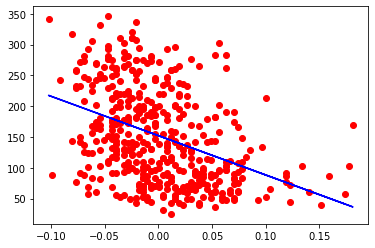

In [38]:
print('min correlation coefficient =', columns[correlations.index(min(correlations))])
x=features_df[['s3']]
y=target_df
linereg = LinearRegression().fit(x, target_df)
ytrain = linereg.intercept_ + linereg.coef_ * x
plt.plot(x,y,'ro',x,ytrain,'b-');
print('mean squared error =', mean_squared_error(y, ytrain))
print('r-squared value =', r2_score(y, ytrain))

The mean squared error is higher and the r-squared value is significantly lower than the initial linear regression. Moreover it also has a moderate negative correlation in the plot above.